# 01 Post process using class

Based on tools and scripts provided by Michael Brazell and Lawrence Cheung

Utilize the abl_stats class to carry out post processing

See https://github.com/Exawind/amr-wind-frontend/blob/main/docs/casestudies/SWIFT/Postprocessing.ipynb

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import os

In [2]:
from moa_python.post_abl_stats import Post_abl_stats
from moa_python.post_hor_plane import Post_hor_plane

## Case 005

In [3]:
case_folder = '/scratch/pfleming/c2c/005_abl_neutral_lowTI'
abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
# abl = Post_abl_stats([full_filename_abl_stats])

In [4]:
hor_plane = Post_hor_plane(full_filename_hor_plane)

Hor_plane has 4 horizontal planes in 11 time steps from 0.0 to 36000.0
Hor_plane levels: [  5.  85. 155. 255.]


In [5]:
hor_plane.get_plane(2,5)

Returning u velocity hor_plane for height 155.0 at time 18000.0


array([[8.73901551, 8.74736656, 8.75436584, ..., 8.7751561 , 8.75345368,
        8.73991377],
       [8.79359672, 8.78663917, 8.76291893, ..., 8.81703012, 8.80574966,
        8.79777642],
       [8.77917331, 8.75651424, 8.70731675, ..., 8.77228493, 8.7797516 ,
        8.78394022],
       ...,
       [8.42581231, 8.43696117, 8.46644734, ..., 8.41806064, 8.42490824,
        8.42560126],
       [8.52815248, 8.54689244, 8.57925231, ..., 8.50429653, 8.51139018,
        8.5182693 ],
       [8.64014558, 8.65769988, 8.68419805, ..., 8.64891312, 8.63834545,
        8.63413917]])

In [6]:
hor_plane.get_mean_plane(2)

Returning u mean velocity hor_plane for height 155.0


array([[8.44646855, 8.45257082, 8.44536095, ..., 8.39331098, 8.41039948,
        8.43032879],
       [8.48799837, 8.49701529, 8.49022732, ..., 8.4165286 , 8.44135933,
        8.46736426],
       [8.4894674 , 8.49899251, 8.49430131, ..., 8.41894954, 8.44420952,
        8.46966165],
       ...,
       [8.26130176, 8.26030148, 8.26744897, ..., 8.2857585 , 8.27522671,
        8.26725066],
       [8.30540808, 8.30388942, 8.3058325 , ..., 8.3132384 , 8.30843484,
        8.30726898],
       [8.37590037, 8.37745156, 8.3734373 , ..., 8.35314665, 8.35859392,
        8.36819715]])

Plotting u velocity hor_plane for height 155.0 at time 18000.0
Returning u velocity hor_plane for height 155.0 at time 18000.0


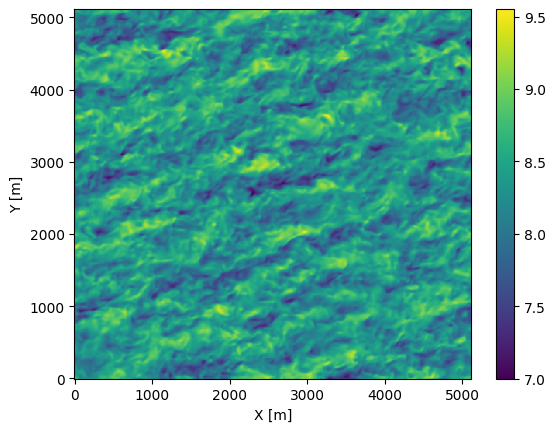

In [7]:
hor_plane.plot_plane(2,5)

Plotting u mean velocity hor_plane for height 155.0
Returning u mean velocity hor_plane for height 155.0


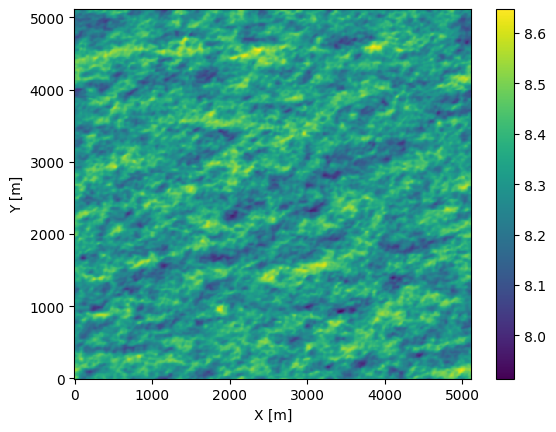

In [8]:
hor_plane.plot_mean_plane(2)

## Parameters

In [20]:
case_folder = '/scratch/pfleming/c2c/000_paul_tries_precursor'
post_processing_file = 'post_processing/abl_statistics00000.nc'

In [21]:
full_filename = os.path.join(case_folder,post_processing_file )

## Case 000

In [22]:
abl = Abl_stats([full_filename])

Object is composed of 1 and time runs from 0.5 to 22000.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 642185772586
    created_on: Thu Dec  8 16:51:43 2022

    dimensions(sizes): num_time_steps(44000), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


#### Visualize vertical velocity

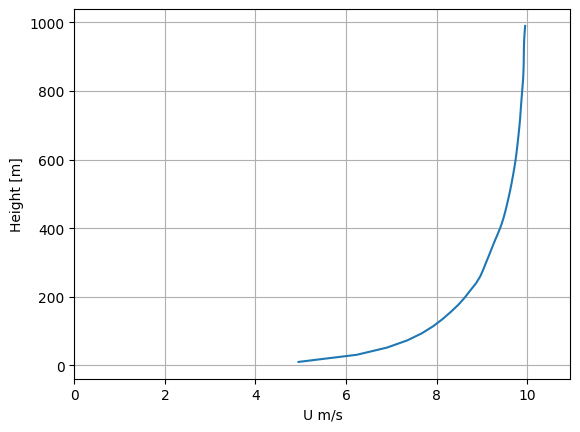

In [23]:
abl.plot_vert_vel_profile(10000,20000) # Show vertical velocity averaged 10000-20000 s

Nearest height to 150 is 156.25


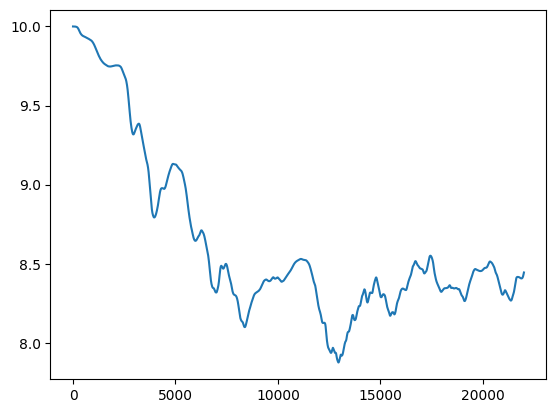

In [24]:
## Show u as a function of time
u = abl.get_time_series_at_height('u', 150) # Get the time values of u at 150 m
plt.plot(abl.time, u)

## Case 001

In [25]:
case_folder = '/scratch/pfleming/c2c/001_add_godunov'
full_filename = os.path.join(case_folder,post_processing_file )
abl = Abl_stats([full_filename])

Object is composed of 1 and time runs from 0.5 to 22000.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 642185772586
    created_on: Thu Dec  8 16:51:47 2022

    dimensions(sizes): num_time_steps(44000), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


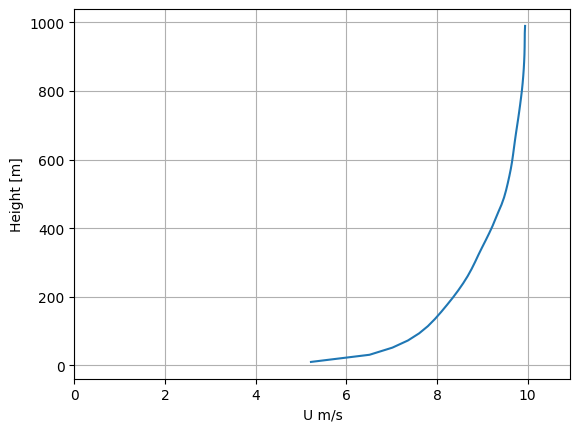

In [26]:
abl.plot_vert_vel_profile(10000,20000) # Show vertical velocity averaged 10000-20000 s

Nearest height to 150 is 156.25


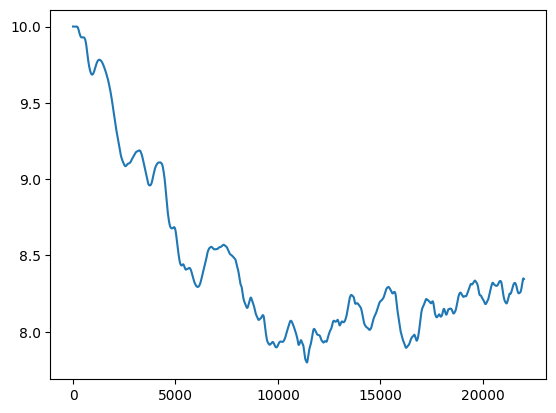

In [27]:
## Show u as a function of time
u = abl.get_time_series_at_height('u', 150) # Get the time values of u at 150 m
plt.plot(abl.time, u)

## Case 002

In [28]:
case_folder = '/scratch/pfleming/c2c/002_larger_domain'
full_filename = os.path.join(case_folder,post_processing_file )
abl = Abl_stats([full_filename])

Object is composed of 1 and time runs from 0.5 to 36000.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 642185772586
    created_on: Thu Jan  5 16:17:02 2023

    dimensions(sizes): num_time_steps(72000), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


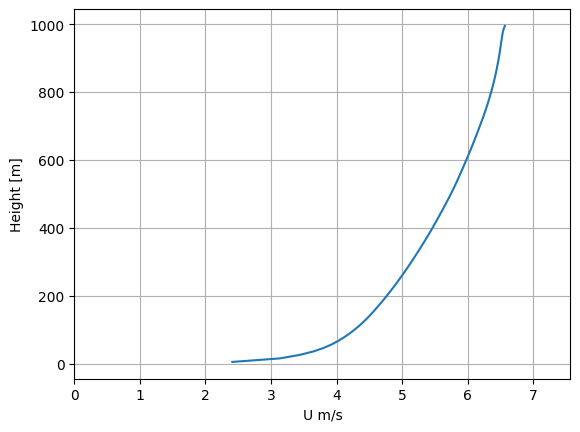

In [29]:
abl.plot_vert_vel_profile(16000,36000) # Show vertical velocity 

Nearest height to 150 is 151.04166666666666


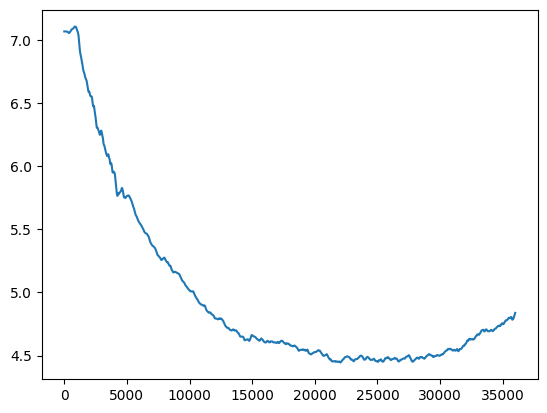

In [30]:
## Show u as a function of time
u = abl.get_time_series_at_height('u', 150) # Get the time values of u at 150 m
plt.plot(abl.time, u)

## Case 003

In [32]:
case_folder = '/scratch/pfleming/c2c/003_inversion_layer'
full_filename = os.path.join(case_folder,post_processing_file )
abl = Abl_stats([full_filename])

Object is composed of 1 and time runs from 0.5 to 36000.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 642185772586
    created_on: Thu Jan  5 16:17:02 2023

    dimensions(sizes): num_time_steps(72000), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


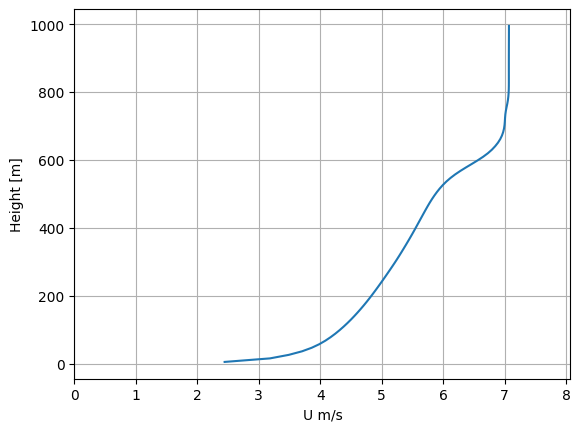

In [33]:
abl.plot_vert_vel_profile(1000,36000) # Show vertical velocity 

Nearest height to 150 is 151.04166666666666


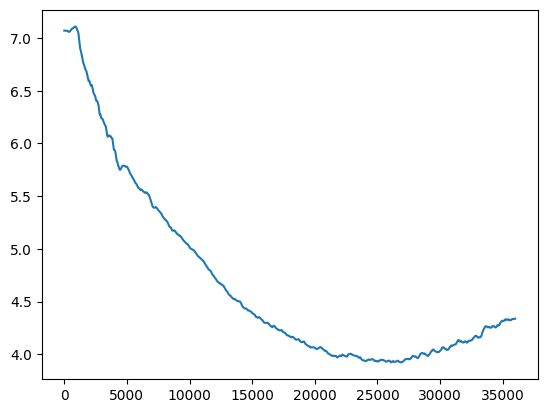

In [34]:
## Show u as a function of time
u = abl.get_time_series_at_height('u', 150) # Get the time values of u at 150 m
plt.plot(abl.time, u)